# 笔记——深度学习简要概率
## 前言
**文中部分内容来源于《动手学深度学习》，官方电子书网址：[《动手学深度学习》 — 动手学深度学习 2.0.0-beta0 documentation (d2l.ai)](http://zh-v2.d2l.ai/index.html)**

## 基本概率论——抛骰子实验

一个公平的骰子，每一面的概率都是1/6。接下来我们通过大数定理（随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率）通过代码验证这一公平的骰子。  
统计学中，*抽样*的定义：从概率分布中抽取样本的过程。直观的讲，*分布*是对事件的概率分配，即某一事件占有多少概率。将概率分配给一些离散选择的分布叫做*多项分布*。  
因为通过for循环来从一个分布中生成多个样本很慢（一个for循环是个单线程），《动手学深度学习》一书中介绍了采用torch的multinomial（多项，多项分布——multinomial distribution）方法来快速的抽取样本。  
以下，第一行展示的结果中是理想（公平）的骰子每一面的概率，第二行是模拟大数定理估计的概率。  

In [4]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from torch.distributions import multinomial

fair_probs = torch.ones([6]) / 6
print(fair_probs)
counts = multinomial.Multinomial(10000,fair_probs).sample()
counts / 10000

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0.1684, 0.1670, 0.1684, 0.1736, 0.1623, 0.1603])

《动手学深度学习》一书中，作者还进行了500组实验，每组抽取10个样本，不断累积抽样次数，可视化了概率随时间的收敛过程。  
**需要注意的是，**书中引用的`d2l`库我并没有安装，而是自己用`matplot.pyplot`画出来的。效果是一样的。

tensor([[1., 0., 3., 4., 2., 0.],
        [1., 1., 2., 1., 3., 2.],
        [0., 1., 4., 1., 2., 2.],
        ...,
        [1., 0., 2., 2., 2., 3.],
        [0., 6., 0., 0., 0., 4.],
        [1., 0., 1., 3., 4., 1.]]) torch.Size([500, 6])
tensor([[  1.,   0.,   3.,   4.,   2.,   0.],
        [  2.,   1.,   5.,   5.,   5.,   2.],
        [  2.,   2.,   9.,   6.,   7.,   4.],
        ...,
        [832., 837., 875., 804., 801., 831.],
        [832., 843., 875., 804., 801., 835.],
        [833., 843., 876., 807., 805., 836.]]) torch.Size([500, 6])
torch.Size([500, 1])
tensor([[0.1000, 0.0000, 0.3000, 0.4000, 0.2000, 0.0000],
        [0.1000, 0.0500, 0.2500, 0.2500, 0.2500, 0.1000],
        [0.0667, 0.0667, 0.3000, 0.2000, 0.2333, 0.1333],
        ...,
        [0.1671, 0.1681, 0.1757, 0.1614, 0.1608, 0.1669],
        [0.1667, 0.1689, 0.1754, 0.1611, 0.1605, 0.1673],
        [0.1666, 0.1686, 0.1752, 0.1614, 0.1610, 0.1672]]) torch.Size([500, 6])


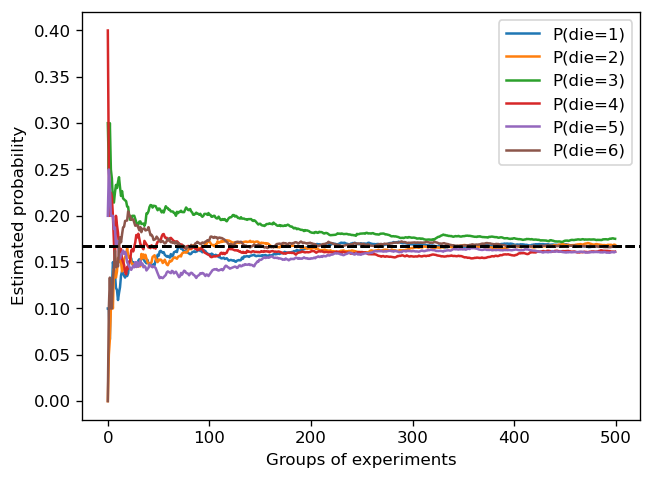

In [11]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
print(counts, counts.shape)
cum_counts = counts.cumsum(dim=0)
print(cum_counts, cum_counts.shape)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(cum_counts.sum(dim=1, keepdims=True).shape)
print(estimates, estimates.shape)

# plot
plt.figure(figsize=(6, 4.5), dpi=120)
for i in range(6):
    plt.plot(estimates[:,i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    plt.axhline(y=0.167, color='black', linestyle='dashed')
    plt.xlabel('Groups of experiments')
    plt.ylabel('Estimated probability')
    plt.legend(loc='upper right')

### 概率论公理
***样本空间（sample space）S:*** 随机试验的一切可能基本结果组成的集合称为样本空间  
***样本点：*** S中的元素  
***事件A：*** S的子集  
***基本事件：*** 只包含一个样本点的事件  
***复合事件：*** 包含多个样本点的事件  
**概率（probability）可以被认为是将集合映射到真实值的函数。在给定的样本空间S中，事件A的概率，表示为P(A)** ，满足以下属性：
 - 对于任意事件 A ，其概率从不会是负数，即 P(A)≥0 ；
 - 整个样本空间的概率为 1 ，即 P(S)=1 ；
 - 对于互斥（mutually exclusive）事件（对于所有 i≠j 都有 Ai∩Aj=∅ ）的任意一个可数序列 A1,A2,… ，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即 P(⋃(∞,i=1)Ai)=∑(∞,i=1)P(Ai) 。
*随机变量（random variable）X：* 在一次实验的一组可能性取值的任意一个值。通常用P(X)表示随机变量X上的概率分布，即分布告诉我们随机变量X取得某一值的概率。于是，我们可以用P(a)表示随机变量X=a的概率。  

我们还需要区分一下离散（discrete）随机变量和连续（continuous）随机变量。直观的讲，就是随机变量的取值范围中是由一个又一个离散的点组成的集合，而连续随机变量是一段连续的区间。当随机变量是连续随机变量时，我们考虑一个随机变量X=a的概率是没有意义的，是0。但是如果是X在[a, b]区间（[a, b]区间又包含于另一更大的样本空间）中的概率就有意义了。这时，这个数值的可能性就被量化为*密度（density）*。  


### 多随机变量
1. **联合概率：** P(A=a,B=b)。给定任意值 a 和 b ，联合概率可以回答： A=a 和 B=b 同时满足的概率是多少？ 请注意，对于任何 a 和 b 的取值， P(A=a,B=b)≤P(A=a) 。  
2. **条件概率：** P(B=b∣A=a)=P(A=a,B=b)/P(A=a)，0<=P(B=b∣A=a)<=1。它是 B=b 的概率，前提是 A=a 已发生。
3. **贝叶斯定理：** 根据乘法法则（multiplication rule ）可得到P(A,B)=P(B∣A)P(A)。根据对称性，可得到P(A,B)=P(A∣B)P(B)。 假设P(B)>0，求解其中一个条件变量，我们得到：$$P(A \mid B)=\frac{P(B \mid A) P(A)}{P(B)}.$$ 注意，P(A,B) 是一个联合分布（joint distribution），P(A∣B) 是一个条件分布（conditional distribution）。这种分布可以在给定值 A=a,B=b 上进行求值。


### 边际化和独立性
***求和法则（sum rule）*** ， 即B的概率相当于计算A的所有可能选择，并将所有选择的联合概率聚合在一起：
$P(B) = \sum_{A} P(A, B),$ 这也称之为*边际化（marginalization）*。 边际化结果的概率或分布称为*边际概率（marginal probability）* 或*边际分布（marginal distribution）*。  
如果两个随机变量 A 和 B 是独立的，意味着事件 A 的发生跟 B 事件的发生无关。 在这种情况下，统计学家通常将这一点表述为 A⊥B 。 根据贝叶斯定理，马上就能同样得到 P(A∣B)=P(A) 。 在所有其他情况下，我们称 A 和 B *依赖*。由于 $P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ 等价于 P(A,B)=P(A)P(B) ， 因此两个随机变量是独立的，当且仅当两个随机变量的联合分布是其各自分布的乘积。 同样地，给定另一个随机变量 C 时，两个随机变量 A 和 B 是条件独立的（conditionally independent）， 当且仅当 P(A,B∣C)=P(A∣C)P(B∣C) 。 这个情况表示为 A⊥B∣C 。

### 期望和方差
***随机变量X的期望（expectation，或平均值（average））：*** $E[X] = \sum_{x} x P(X = x).$   
***随机变量函数f(x)的期望（expectation，或平均值（average））：*** $ E_{x \sim P}[f(x)] = \sum_x f(x) P(x)$ ,其中函数f(x)的输入是从分布P中抽取的随机变量。  
***随机变量X的方差:*** 衡量随机变量X与其期望值的偏置。 $\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$  
***随机变量函数f(x)的方差:*** 衡量从该随机变量分布中采样不同值x时，函数值偏离该函数的期望的程度。 $\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$ 

